## Exploratory data analysis - EDA 📊

- The analysis part was focusing on some features only that gives more understanding to the data and haert disease diagnosis process.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import cvxopt
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from fast_ml.model_development import train_valid_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score


Reading the data

In [2]:
df= pd.read_csv('heart.csv')
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


Shape of dataset 

In [3]:
df.shape #num of rows =1190, #12 features

(1190, 12)

Description

In [4]:
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [5]:
#all int, except one with float value. 'oldpeak'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


To check the presence of missing values.

In [6]:
df.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

It can be seen that there are no missing values

In [7]:
df.nunique() #checking uniqe values as well for each feature.

age                     50
sex                      2
chest pain type          4
resting bp s            67
cholesterol            222
fasting blood sugar      2
resting ecg              3
max heart rate         119
exercise angina          2
oldpeak                 53
ST slope                 4
target                   2
dtype: int64

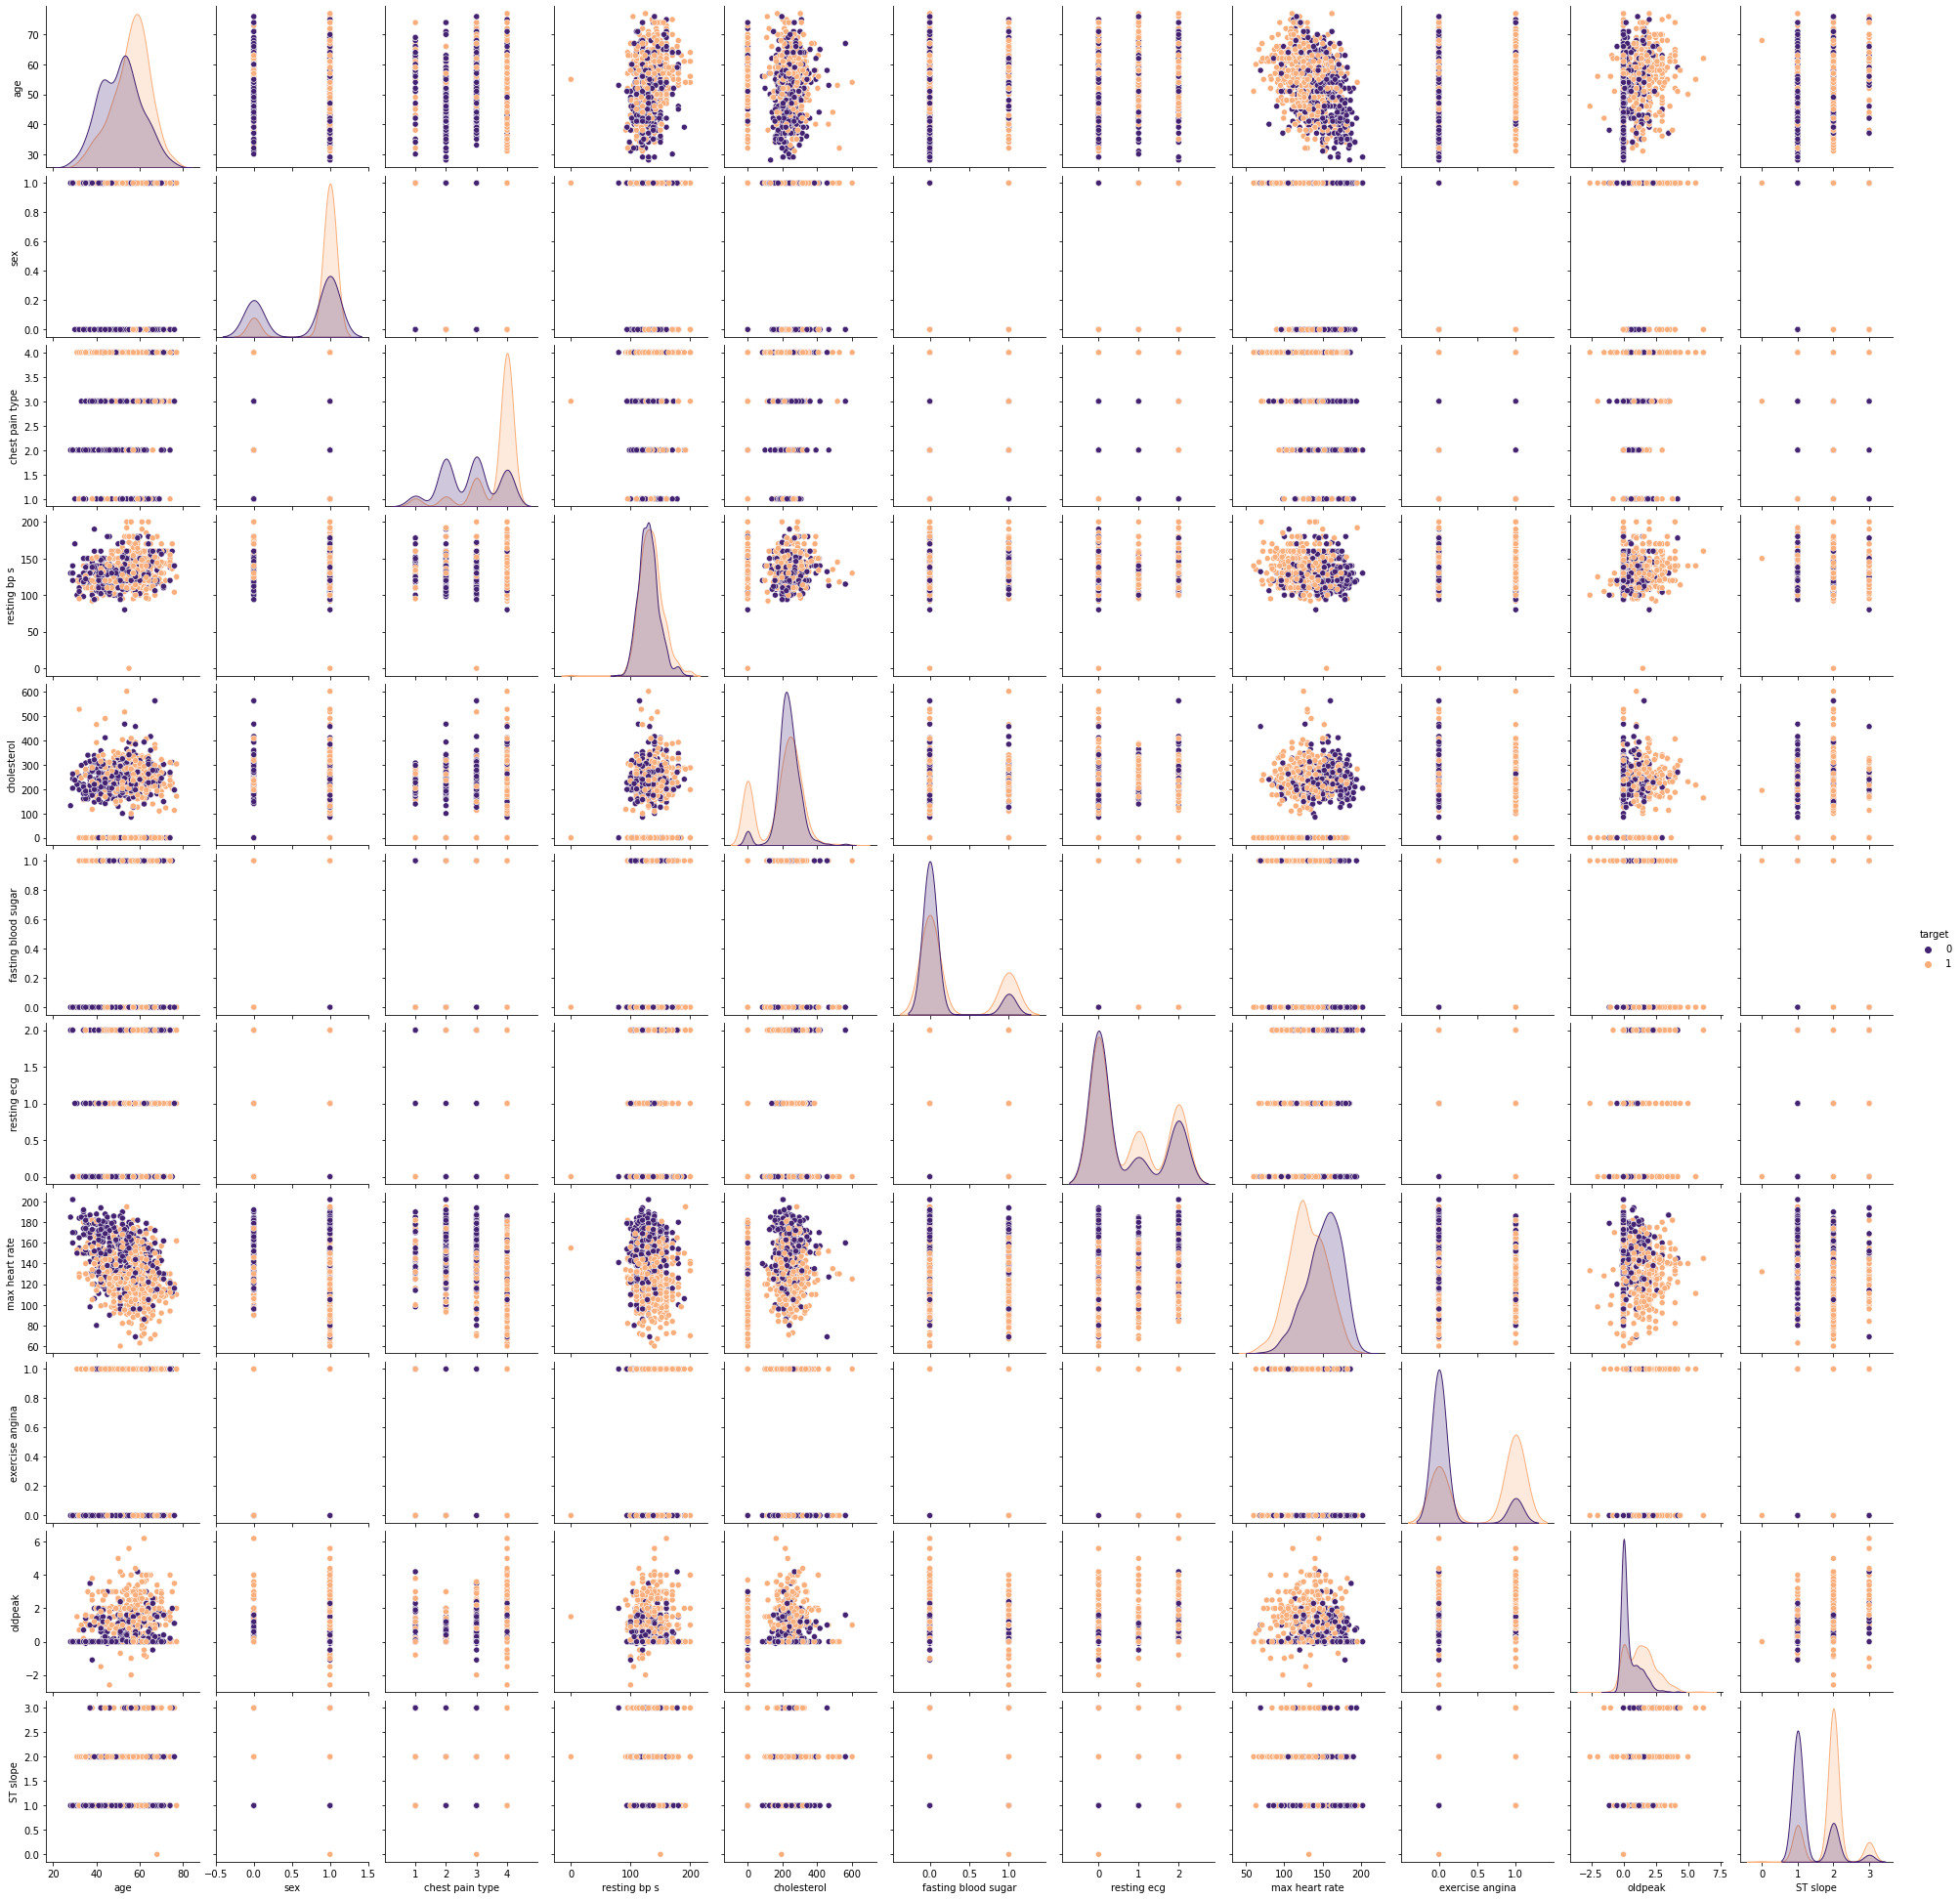

In [8]:
sns.pairplot(data=df,hue='target', palette=['#432371',"#FAAE7B"])

In [9]:
df["target"].unique() #0 no, 1 for yes (clearly a classification)

array([0, 1], dtype=int64)

# Target- HeartDisease 🫀

1    629
0    561
Name: target, dtype: int64


'x=df["target"]'

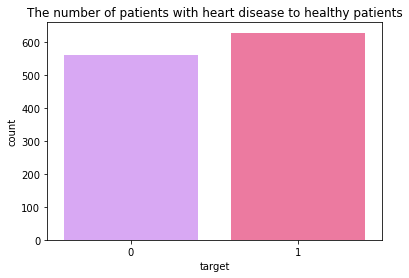

In [10]:
target_temp = df.target.value_counts()
print(target_temp)
#plotting 
sns.countplot(x=df["target"], palette=['#DB9BFF',"#FF679A"]) #629- yes (1: heart disease, 0: Normal)
plt.title('The number of patients with heart disease to healthy patients')
'x=df["target"]'

Number of people with heart disease is more than the healthy ones.

In [11]:
#In percentage ,53% deals with heart problems.
print("Percentage of patients without heart problems: "+str(round(target_temp[0]*100/1190)),'%')
print("Percentage of patients with heart problems: "+str(round(target_temp[1]*100/1190)),'%')

Percentage of patients without heart problems: 47 %
Percentage of patients with heart problems: 53 %


# 🫀Age

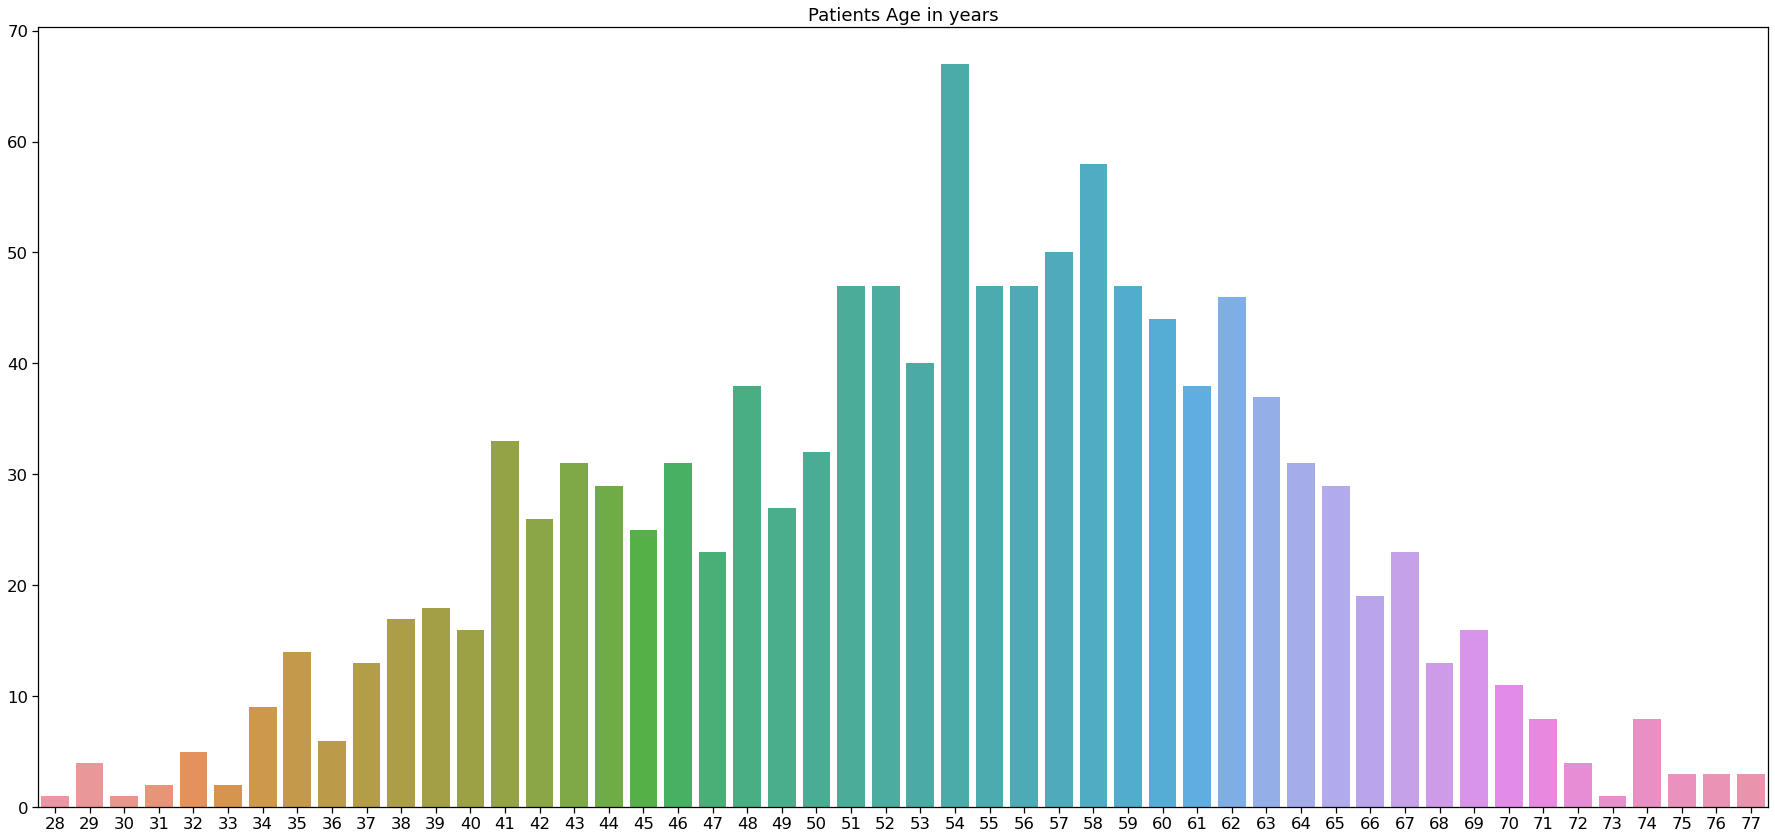

In [12]:
plt.figure(figsize=(25,12))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=df.age.value_counts()[:].index,y=df.age.value_counts()[:].values)
plt.title('Patients Age in years')
plt.tight_layout()

- Most of the patients are around the age of 54

In [13]:
#more details
print('min age: ',(df.age.min()))

print('max age: ',(df.age.max()))

print('mean age: ',round(df.age.mean()))

min age:  28
max age:  77
mean age:  54


We tried to fit the ages in 3 different categories

Text(0.5, 1.0, 'Patients Age in category')

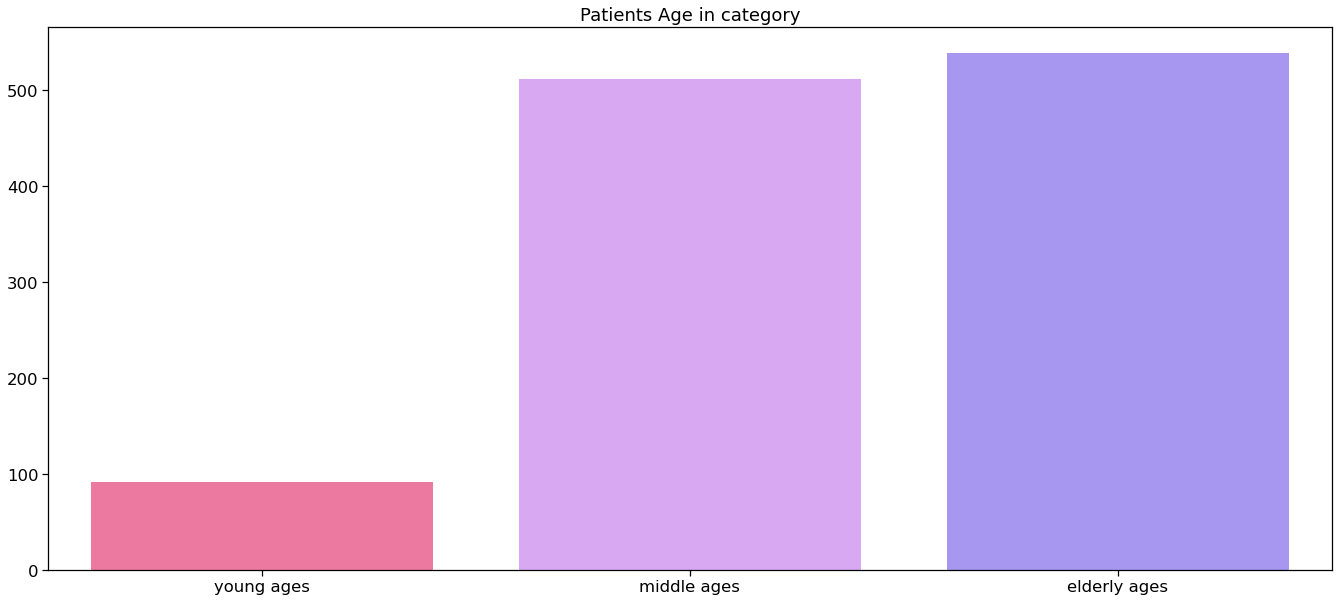

In [14]:
Young = df[(df.age>=28)&(df.age<40)]
Middle = df[(df.age>=40)&(df.age<55)]
Elder = df[(df.age>55)]

plt.figure(figsize=(23,10))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(Young),len(Middle),len(Elder)], palette=["#FF679A",'#DB9BFF','#9D88FF'])
plt.title('Patients Age in category')


## 🫀Sex 

1    909
0    281
Name: sex, dtype: int64


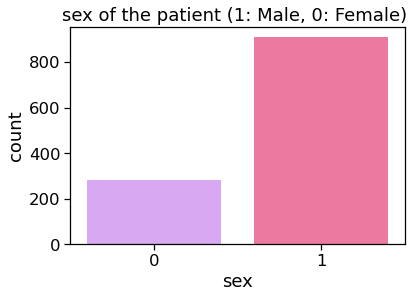

In [15]:
#plotting 
sns.countplot(x=df["sex"],  palette=['#DB9BFF',"#FF679A"])
plt.title('sex of the patient (1: Male, 0: Female) ')
sex_temp = df['sex'].value_counts()
print(sex_temp) 


In [16]:
print("Percentage of Female patients : "+str(round(sex_temp[0]*100/1190)),'%')
print("Percentage of Male patients: "+str(round(sex_temp[1]*100/1190)), '%')

Percentage of Female patients : 24 %
Percentage of Male patients: 76 %


In comparison with the target

Text(0.5, 1.0, 'Sex vs Heart Disease')

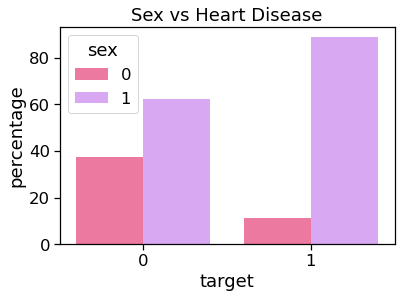

In [17]:
temp = (df.groupby(['target']))['sex'].value_counts(normalize=True).mul(100).reset_index(name = "percentage") #after applying normalization
sns.barplot(x = "target", y = "percentage", hue = 'sex', data = temp, palette=["#FF679A",'#DB9BFF','#9D88FF']).set_title("Sex vs Heart Disease")

- Male patients got the highest percentage of heart disease.

## 🫀ChestPainType

Type of chest pain categorized into ➤ 1 : typical, 2 : typical angina, 3 : non-anginal pain, 4 : asymptomatic

Text(0.5, 1.0, 'ChestPainType categorized')

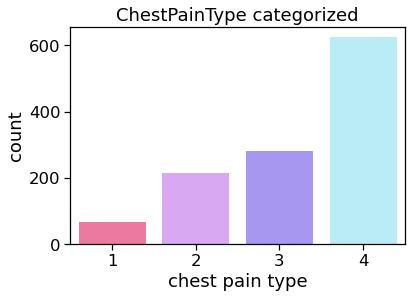

In [18]:
sns.countplot(x=df["chest pain type"],palette=["#FF679A",'#DB9BFF','#9D88FF', '#AFF3FF'])
plt.title('ChestPainType categorized')

In comparison with the target

Text(0.5, 1.0, 'Chest Pain vs Heart Disease')

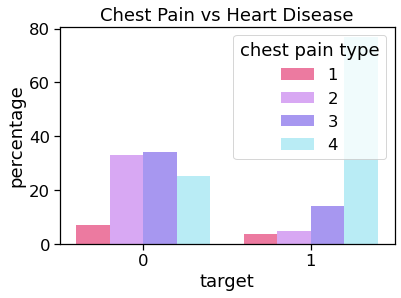

In [19]:
temp = (df.groupby(['target']))['chest pain type'].value_counts(normalize=True).mul(100).reset_index(name = "percentage") #after applying normalization
sns.barplot(x = "target", y = "percentage", hue = "chest pain type", data = temp,palette=["#FF679A",'#DB9BFF','#9D88FF', '#AFF3FF']).set_title("Chest Pain vs Heart Disease")

- Asymptomatic chest pain type took the highest ranking in terms of the patients with heart disease. <br> 
This type of pain can be considered one of the main alrams of discovering the existence of heart disease.

## 🫀RestingBP

- It is the level of the blood pressure at resting mode in mm/HG.

## 🫀Cholesterol

- It is the serum cholesterol [mm/dl]. <br>
Normally it falls under the range of [120-600]

In [20]:
#more details
print('min cholesterol in the data: ',(df['cholesterol'].min()))

print('max cholesterol in the data: ',(df['cholesterol'].max()))

print('mean cholesterol in the data: ',round(df['cholesterol'].mean()))

min cholesterol in the data:  0
max cholesterol in the data:  603
mean cholesterol in the data:  210


- As we can see the zeros in here dosn't refer to any medical reference. <br>
We handle this problem as an outiler in the preprocessing stage.

In [21]:
# Get min, max and average of the Cholestoral of the people do not have heart diseas
print('Min cholestoral of people who do not have heart disease: ', min(df[df['target'] == 0]['cholesterol']))
print('Max cholestoral of people who do not have heart disease: ', max(df[df['target'] == 0]['cholesterol']))
print('Average cholestoral of people who do not have heart disease: ', df[df['target'] == 0]['cholesterol'].mean())

Min cholestoral of people who do not have heart disease:  0
Max cholestoral of people who do not have heart disease:  564
Average cholestoral of people who do not have heart disease:  231.6577540106952


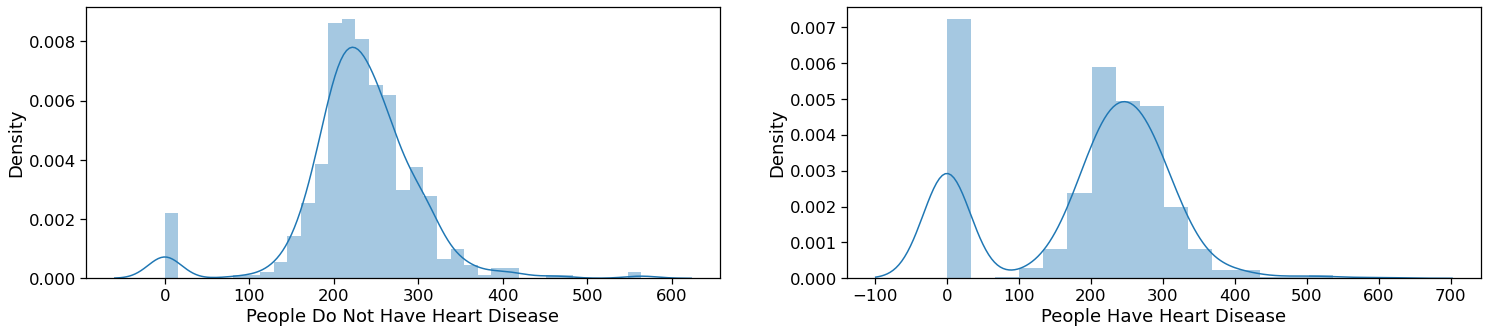

In [22]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(25, 5))
ax = sns.distplot(df[df['target'] == 0]['cholesterol'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel='People Do Not Have Heart Disease')
ax = sns.distplot(df[df['target'] == 1]['cholesterol'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel='People Have Heart Disease')
plt.show()

## 🫀FastingBS

- Fasting blood sugar [1: if FastingBS > 120 mg/dl (true), 0: otherwise (false)].

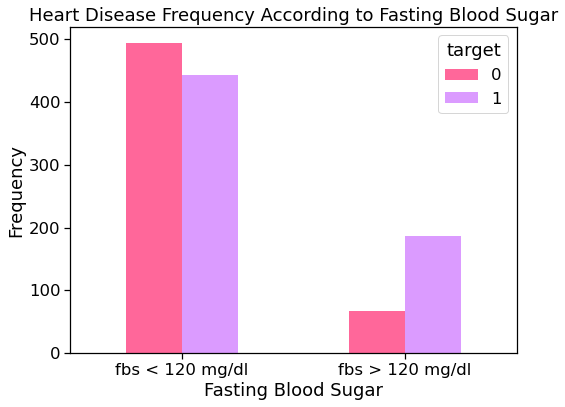

In [23]:
pd.crosstab(df['fasting blood sugar'],df.target).plot(kind = "bar", figsize = (8, 6), color=['#FF679A', '#DB9BFF', '#9D88FF', '#AFF3FF'] )
plt.title('Heart Disease Frequency According to Fasting Blood Sugar')
plt.xlabel('Fasting Blood Sugar')
plt.xticks(np.arange(2), ('fbs < 120 mg/dl', 'fbs > 120 mg/dl'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

## 🫀Resting ECG

- The result of electrocardiogram at rest ➤ 0: Normal, 1: ST , 2: LVH-Left Ventricular Hypertrophy

Text(0.5, 1.0, 'resting ecg vs Heart Disease')

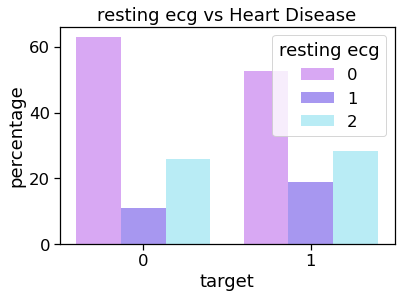

In [24]:
temp = (df.groupby(['target']))['resting ecg'].value_counts(normalize=True).mul(100).reset_index(name = "percentage") #after applying normalization
sns.barplot(x = "target", y = "percentage", hue = "resting ecg", data = temp, palette=['#DB9BFF','#9D88FF', '#AFF3FF', "#FF679A"]  ).set_title("resting ecg vs Heart Disease")

## 🫀MaxHR 

- The maximum heart rate achieved which take place in the range between 60-202

In [25]:
#more details
print('min heart rate in the data: ',(df['max heart rate'].min()))

print('max heart rate in the data: ',(df['max heart rate'].max()))

print('mean heart rate in the data: ',round(df['max heart rate'].mean()))

min heart rate in the data:  60
max heart rate in the data:  202
mean heart rate in the data:  140


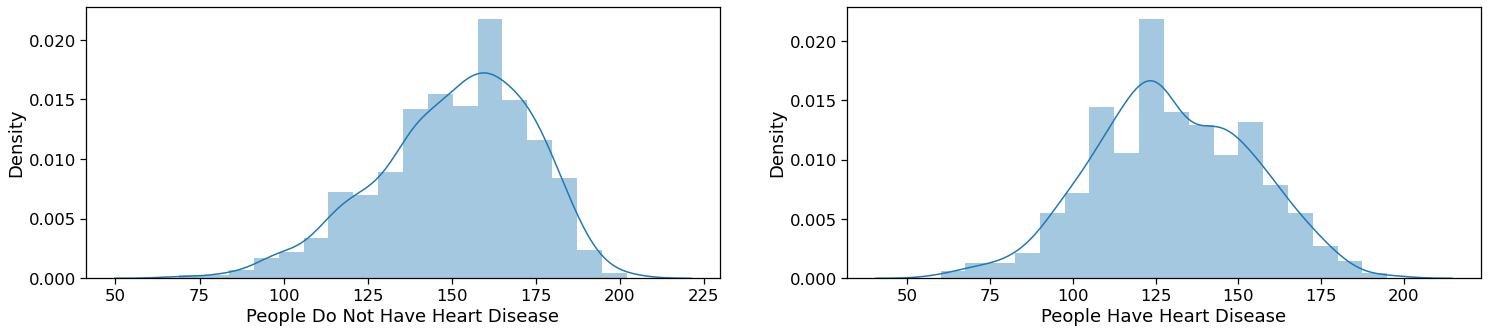

In [26]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(25, 5))
ax = sns.distplot(df[df['target'] == 0]['max heart rate'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel = 'People Do Not Have Heart Disease')
ax = sns.distplot(df[df['target'] == 1]['max heart rate'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel = 'People Have Heart Disease')
plt.show()

## 🫀ExerciseAngina 

exercise-induced angina  ➤ [1: Yes, 0: No]

Text(0.5, 1.0, 'Exercise angina 0: depicting NO, 1: depicting YES')

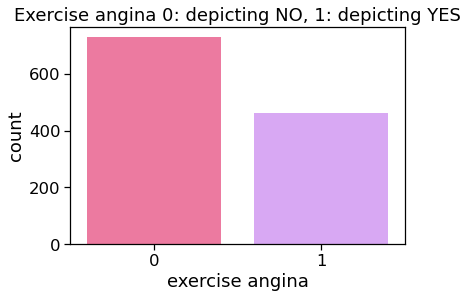

In [27]:
sns.countplot(x=df['exercise angina'],palette=["#FF679A",'#DB9BFF','#9D88FF', '#AFF3FF'])
plt.title('Exercise angina 0: depicting NO, 1: depicting YES')

- Note : Depicting yes is the (not normal) type.

In comparison with the target

Text(0.5, 1.0, 'exercise angina vs Heart Disease')

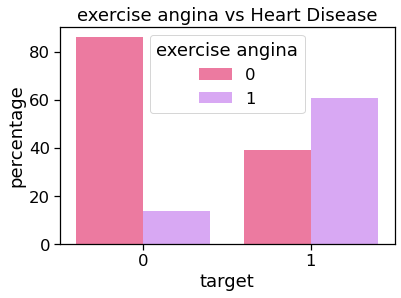

In [28]:
temp = (df.groupby(['target']))['exercise angina'].value_counts(normalize=True).mul(100).reset_index(name = "percentage") #after applying normalization
sns.barplot(x = "target", y = "percentage", hue = "exercise angina", data = temp,palette=["#FF679A",'#DB9BFF','#9D88FF', '#AFF3FF'] ).set_title("exercise angina vs Heart Disease")

- Quite interesting..<br>
The (Not normal) angina pain that comes from exercise mainly is a factor for people with heart disease.

## 🫀Oldpeak

-  oldpeak = ST [Numeric value measured in depression]

## 🫀ST_Slope

The slope of the peak exercise ST segment ➤ [0: Normal 1: Upsloping 2: Flat 3: Downsloping]

<AxesSubplot:xlabel='ST slope', ylabel='count'>

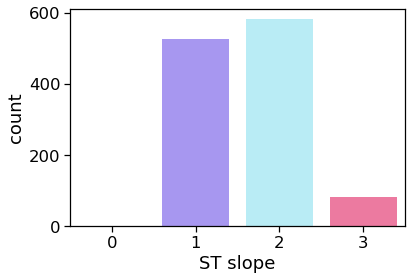

In [29]:
sns.countplot(x=df["ST slope"], palette=['#DB9BFF','#9D88FF', '#AFF3FF', "#FF679A"] )

In comparison with the target

Text(0.5, 1.0, 'ST slope vs Heart Disease')

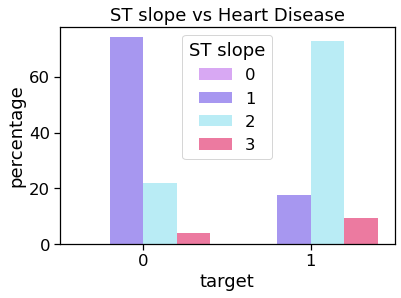

In [30]:
temp = (df.groupby(['target']))['ST slope'].value_counts(normalize=True).mul(100).reset_index(name = "percentage") #after applying normalization
sns.barplot(x = "target", y = "percentage", hue = "ST slope", data = temp, palette=['#DB9BFF','#9D88FF', '#AFF3FF', "#FF679A"]  ).set_title("ST slope vs Heart Disease")

- The highest ST slpoe test for the patients with heart disease possibilty are the ones having type 2 (upsloping).

## 🖱️Preprocessing 


In [31]:
df.shape
#Shape before dropping

(1190, 12)

In [32]:
df.drop_duplicates(inplace=True)
#firstly we'll drop the duplicates instance

In [33]:
df.shape
#Shape after dropping

(918, 12)

#### 🩺 resting bp s

<AxesSubplot:>

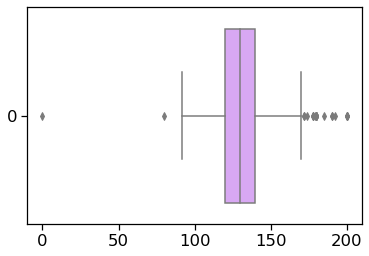

In [34]:
sns.boxplot(data=df['resting bp s'],orient='h',palette=['#DB9BFF'])

In [35]:
df['resting bp s'].describe()

count    918.000000
mean     132.396514
std       18.514154
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: resting bp s, dtype: float64

In [36]:
df['resting bp s'].replace(0, np.nan, inplace=True) # 0 value disguised as missing

In [37]:
df['resting bp s'].isnull().sum()

1

In [38]:
imputer = KNNImputer(n_neighbors=5, metric='nan_euclidean')

df['resting bp s'] = imputer.fit_transform(df[['resting bp s']])

In [39]:
df['resting bp s'].describe()

count    918.000000
mean     132.540894
std       17.989932
min       80.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: resting bp s, dtype: float64

<AxesSubplot:>

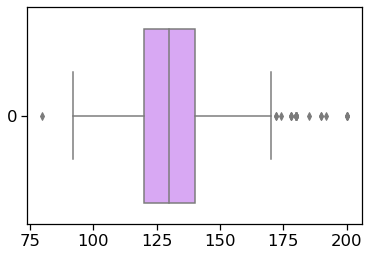

In [40]:
sns.boxplot(data=df['resting bp s'],orient='h',palette=['#DB9BFF'])

#### 🩺 Cholesterol


<AxesSubplot:>

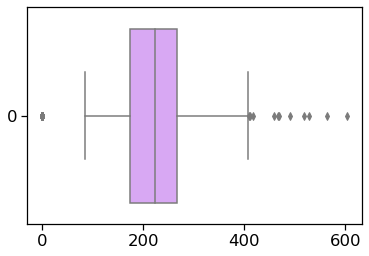

In [41]:
sns.boxplot(data=df['cholesterol'],orient='h',palette=['#DB9BFF'])

In [42]:
df['cholesterol'].describe()

count    918.000000
mean     198.799564
std      109.384145
min        0.000000
25%      173.250000
50%      223.000000
75%      267.000000
max      603.000000
Name: cholesterol, dtype: float64

In [43]:
df['cholesterol'].replace(0, np.nan, inplace=True) # 0 value disguised as missing

In [44]:
df['cholesterol'].replace(603, np.nan, inplace=True) # 603 as an outlier value 

In [45]:
df['cholesterol'].isnull().sum()

173

In [46]:
imputer = KNNImputer(n_neighbors=5, metric='nan_euclidean')

df['cholesterol'] = imputer.fit_transform(df[['cholesterol']])

In [47]:
df['cholesterol'].describe()

count    918.000000
mean     244.154362
std       51.986296
min       85.000000
25%      214.000000
50%      244.154362
75%      267.000000
max      564.000000
Name: cholesterol, dtype: float64

<AxesSubplot:>

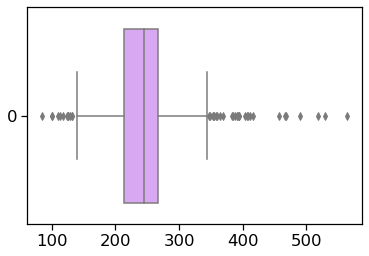

In [48]:
sns.boxplot(data=df['cholesterol'],orient='h',palette=['#DB9BFF'])

#### 🩺 Max heart rate

<AxesSubplot:>

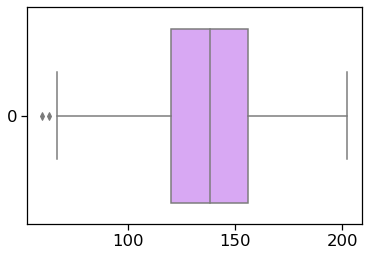

In [49]:
sns.boxplot(data=df['max heart rate'],orient='h',palette=['#DB9BFF'])

In [50]:
df['max heart rate'].describe()

count    918.000000
mean     136.809368
std       25.460334
min       60.000000
25%      120.000000
50%      138.000000
75%      156.000000
max      202.000000
Name: max heart rate, dtype: float64

In [51]:
df['max heart rate'].replace(202, np.nan, inplace=True) # 0 value disguised as missing

In [52]:
df['max heart rate'].isnull().sum()

1

In [53]:
imputer = KNNImputer(n_neighbors=5, metric='nan_euclidean')

df['max heart rate'] = imputer.fit_transform(df[['max heart rate']])

In [54]:
df['max heart rate'].describe()

count    918.000000
mean     136.738277
std       25.369058
min       60.000000
25%      120.000000
50%      138.000000
75%      155.750000
max      195.000000
Name: max heart rate, dtype: float64

In [55]:
df.drop(df[df['ST slope'] == 0 ].index, inplace = True)

Text(0.5, 1.0, 'ST slope vs Heart Disease')

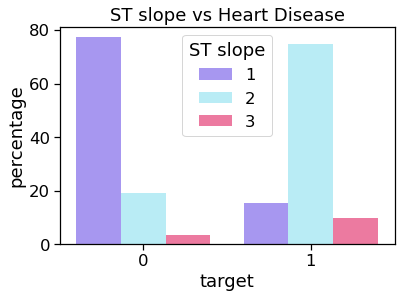

In [56]:
temp = (df.groupby(['target']))['ST slope'].value_counts(normalize=True).mul(100).reset_index(name = "percentage") #after applying normalization
sns.barplot(x = "target", y = "percentage", hue = "ST slope", data = temp, palette=['#9D88FF', '#AFF3FF', "#FF679A"]  ).set_title("ST slope vs Heart Disease")

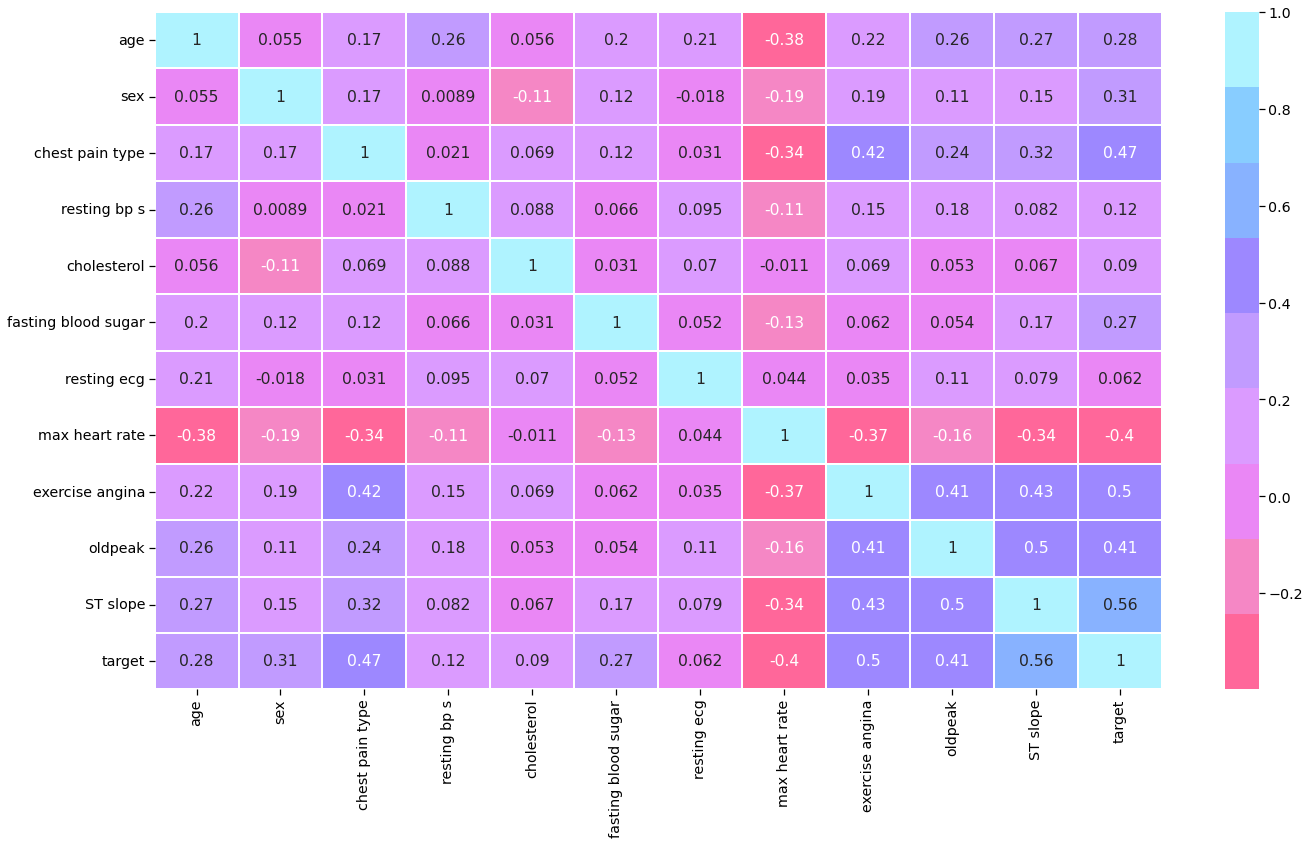

In [156]:
#to veiw the colleration +/-
plt.figure(figsize=(20,12))
sns.set_context('notebook',font_scale = 1.3)
sns.heatmap(df.corr(),annot=True,linewidth =2 , cmap=['#ff679a','#f587c5', '#ea87f5', "#db9bff",'#c19bff','#9d88ff','#88b2ff','#88cdff','#aff3ff'])
plt.tight_layout()

In [58]:
print(df.corr()["target"].abs().sort_values(ascending=False))
#the colleration with the target
#with less correlated resting ecg, highest is ST slope
#Correlation before preprocessing

target                 1.000000
ST slope               0.558541
exercise angina        0.495490
chest pain type        0.471846
oldpeak                0.405098
max heart rate         0.398741
sex                    0.305118
age                    0.281019
fasting blood sugar    0.266109
resting bp s           0.117098
cholesterol            0.089580
resting ecg            0.061791
Name: target, dtype: float64


## 🖱️Building The Model

In [59]:
X= df.drop(columns=['target'], axis=1) 
y= df['target']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=132)

In [61]:
print('X_Train : ',X_train.shape)
print('Y_Train : ',y_train.shape)
print('X_Test : ',X_test.shape)
print('Y_Test : ',y_test.shape)

X_Train :  (733, 11)
Y_Train :  (733,)
X_Test :  (184, 11)
Y_Test :  (184,)


In [62]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=52)
x_train_smote,y_train_smote = smote.fit_resample(X_train,y_train)

In [63]:
#feature scalling
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(x_train_smote)
X_test = sc.transform(X_test)


classification_report

In [157]:
def classification_report(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    
    print(f'---------------{model_name}--------------')
    print('accuracy score: ', accuracy_score(y_test, y_pred))
    print('recall score: ', recall_score(y_test, y_pred))
    print('precision score: ', precision_score(y_test, y_pred))
    print('f1-score score: ', f1_score(y_test, y_pred))
    
    plt.figure(figsize = (9,5))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='.4g', cmap=['#DB9BFF','#9D88FF', '#AFF3FF', "#FF679A"] )

roc_curve

In [122]:
import numpy as np
from sklearn.metrics import roc_curve,auc
#to capture the preformance 
def roc_curve1(module):

    y_pred_quant = module.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

    fig, ax = plt.subplots()
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve for Heart disease classifier')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.grid(True)

### 📁 Logestic regression using GridSearch

In [123]:
from matplotlib.pyplot import grid
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to search
param_grid_LR= {'C': [0.001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'penalty': ['l1', 'l2'],}

# Create a logistic regression object
logreg = LogisticRegression(random_state=52)

# Create a grid search object
logesticregression = GridSearchCV(estimator=logreg, param_grid=param_grid_LR,scoring='accuracy', cv=5, return_train_score=False)

In [124]:
logesticregression.fit(X_train, y_train_smote)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=52),
             param_grid={'C': [0.001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [125]:
logesticregression.best_params_

{'C': 1, 'penalty': 'l2'}

In [126]:
logesticregression.score(X_train,y_train_smote)

0.8604938271604938

---------------Logestic Regression --------------
accuracy score:  0.9130434782608695
recall score:  0.9215686274509803
precision score:  0.9215686274509803
f1-score score:  0.9215686274509803


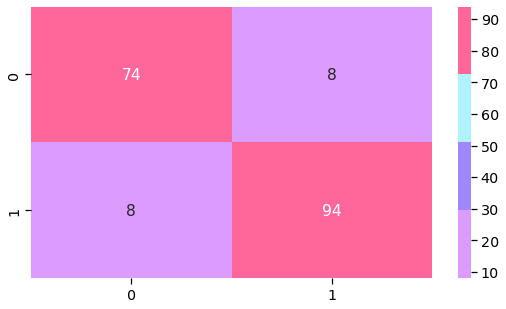

In [158]:
classification_report(logesticregression, X_test, y_test, 'Logestic Regression ')

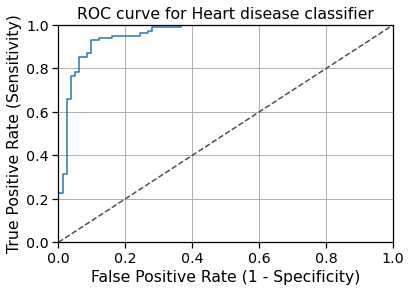

In [128]:
roc_curve1(logesticregression)

### 📁 SVM

In [129]:
# Grid search to find best paramaters
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold

param_grid_SVM = [
    
  {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['linear']}, # Ran too slowly with these

]
estimator = SVC(random_state=52,kernel='linear',probability=True)

svm = GridSearchCV(
    
    
    estimator=estimator, 
    param_grid=param_grid_SVM,
    scoring='accuracy', 
    n_jobs=-1,cv=5,
    return_train_score=False
    )



In [130]:
svm.fit(X_train, y_train_smote)

GridSearchCV(cv=5,
             estimator=SVC(kernel='linear', probability=True, random_state=52),
             n_jobs=-1,
             param_grid=[{'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['linear']}],
             scoring='accuracy')

In [131]:
svm.best_params_

{'C': 100, 'gamma': 0.0001, 'kernel': 'linear'}

In [132]:
svm.score(X_train,y_train_smote) #training score

0.8604938271604938

---------------SVM --------------
accuracy score:  0.907608695652174
recall score:  0.9411764705882353
precision score:  0.897196261682243
f1-score score:  0.9186602870813397


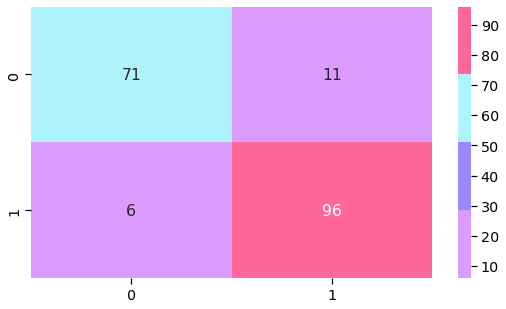

In [159]:
classification_report(svm, X_test, y_test, 'SVM ') #testing score

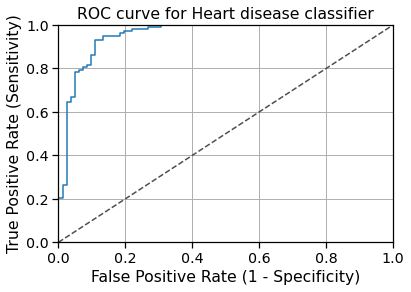

In [142]:
roc_curve1(svm)

### 📁 Random Forest

In [143]:
rfc=RandomForestClassifier(random_state=52)

#from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

param_grid_RF = { 
    'n_estimators': [200, 350],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid_RF,scoring='accuracy', cv=5, return_train_score=False)


In [145]:
CV_rfc.fit(X_train, y_train_smote)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=52),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 350]},
             scoring='accuracy')

In [146]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 350}

In [147]:
CV_rfc.score(X_train, y_train_smote) #training Score

0.9740740740740741

---------------Random Forest--------------
accuracy score:  0.9456521739130435
recall score:  0.9607843137254902
precision score:  0.9423076923076923
f1-score score:  0.9514563106796117


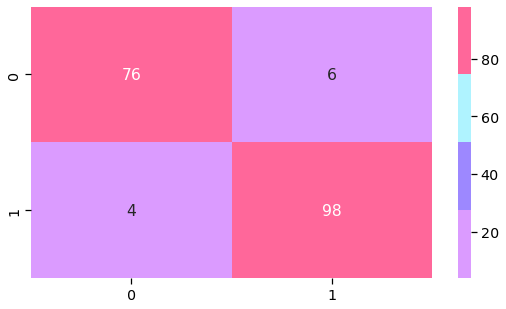

In [160]:
classification_report(CV_rfc, X_test, y_test, 'Random Forest')


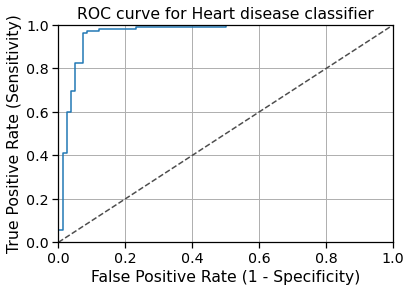

In [149]:
roc_curve1(CV_rfc)

## 🖱️Optmization 

In [150]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE

def rf(algo,n):
    tree = algo

    rfe = RFE(estimator=tree, n_features_to_select=n, step=1)
    rfe.fit(X_train, y_train_smote)
    print(rfe.get_feature_names_out())


In [151]:
rf(logreg,9)
rf(logreg,6)
rf(logreg,3)
rf(logreg,1)

['x1' 'x2' 'x3' 'x4' 'x5' 'x7' 'x8' 'x9' 'x10']
['x1' 'x2' 'x5' 'x7' 'x9' 'x10']
['x2' 'x9' 'x10']
['x10']


#### 📌 LogisticRegression ( 80% - 20% )

- 9 / ['x1' 'x2' 'x3' 'x4' 'x5' 'x7' 'x8' 'x9' 'x10']
      Drop ='age','resting ecg'

- 6 / ['x1' 'x2' 'x5' 'x7' 'x9' 'x10']
      Drop ='age','resting bp s','cholesterol','resting ecg','exercise angina'

- 3 / ['x2' 'x9' 'x10']
      Drop ='age','sex','resting bp s','cholesterol','fasting blood sugar','resting ecg','max heart rate','exercise angina'

- 1 / ['x10']
      Drop ='age','sex','chest pain type','resting bp s','cholesterol','fasting blood sugar','resting ecg','max heart rate','exercise angina','oldpeak'

#### 📌 LogisticRegression ( 70% - 30% )

- 9 / ['x0' 'x1' 'x2' 'x4' 'x5' 'x7' 'x8' 'x9' 'x10']
      Drop ='resting bp s','resting ecg'

- 6 / ['x1' 'x2' 'x5' 'x7' 'x9' 'x10']
      Drop ='age','resting bp s','cholesterol','resting ecg','exercise angina'
 
- 3 / ['x2' 'x9' 'x10']
      Drop ='age','sex','resting bp s','cholesterol','fasting blood sugar','resting ecg','max heart rate','exercise angina'

- 1 / ['x10']
      Drop ='age','sex','chest pain type','resting bp s','cholesterol','fasting blood sugar','resting ecg','max heart rate','exercise angina','oldpeak'

In [152]:
rf(estimator,9)
rf(estimator,6)
rf(estimator,3)
rf(estimator,1)

['x1' 'x2' 'x3' 'x4' 'x5' 'x7' 'x8' 'x9' 'x10']
['x1' 'x2' 'x4' 'x7' 'x9' 'x10']
['x2' 'x9' 'x10']
['x10']


#### 📌 SVM ( 80% - 20% )

- 9 / ['x1' 'x2' 'x3' 'x4' 'x5' 'x7' 'x8' 'x9' 'x10']
      Drop ='age','resting ecg'

- 6 / ['x1' 'x2' 'x4' 'x7' 'x9' 'x10']
      Drop ='age','resting bp s','fasting blood sugar','resting ecg','exercise angina'

- 3 / ['x2' 'x9' 'x10']
      Drop ='age','sex','resting bp s','cholesterol','fasting blood sugar','resting ecg','max heart rate','exercise angina'

- 1 / ['x10']
      Drop ='age','sex','chest pain type','resting bp s','cholesterol','fasting blood sugar','resting ecg','max heart rate','exercise angina','oldpeak'

#### 📌 SVM ( 70% - 30% )

- 9 / ['x0' 'x1' 'x2' 'x4' 'x5' 'x7' 'x8' 'x9' 'x10']
      Drop ='resting bp s','resting ecg'

- 6 / ['x2' 'x4' 'x5' 'x7' 'x9' 'x10']
      Drop ='age','sex','resting bp s','resting ecg','exercise angina'
 

- 3 / ['x2' 'x9' 'x10']
      Drop ='age','sex','resting bp s','cholesterol','fasting blood sugar','resting ecg','max heart rate','exercise angina'

- 1 / ['x10']
      Drop ='age','sex','chest pain type','resting bp s','cholesterol','fasting blood sugar','resting ecg','max heart rate','exercise angina','oldpeak'

In [153]:
rf(rfc,9)
rf(rfc,6)
rf(rfc,3)
rf(rfc,1)

['x0' 'x2' 'x3' 'x4' 'x5' 'x7' 'x8' 'x9' 'x10']
['x0' 'x2' 'x4' 'x7' 'x9' 'x10']
['x2' 'x7' 'x10']
['x7']


#### 📌 Random Forest ( 80% - 20% )

- 9 / ['x0' 'x2' 'x3' 'x4' 'x5' 'x7' 'x8' 'x9' 'x10']
      Drop ='sex','resting ecg'

- 6 / ['x0' 'x2' 'x4' 'x7' 'x9' 'x10']
      Drop ='age','chest pain type','cholesterol','max heart rate','oldpeak','ST slope'

- 3 / ['x2' 'x7' 'x10']
      Drop ='age','sex','resting bp s','cholesterol','fasting blood sugar','resting ecg','exercise angina','oldpeak'

- 1 / ['x7']
      Drop ='age','sex','chest pain type','resting bp s','cholesterol','fasting blood sugar','resting ecg','exercise angina','oldpeak','ST slope'

#### 📌 Random Forest ( 70% - 30% )
      
- 9 / ['x0' 'x2' 'x3' 'x4' 'x5' 'x7' 'x8' 'x9' 'x10']
      Drop ='sex','resting ecg'

- 6 / ['x0' 'x2' 'x4' 'x7' 'x9' 'x10']
      Drop ='age','cholesterol','resting ecg','oldpeak','ST slope'

- 3 / ['x7' 'x9' 'x10']
      Drop ='age','sex','chest pain type','resting bp s','cholesterol','fasting blood sugar','resting ecg','exercise angina'

- 1 / ['x7']
      Drop ='age','sex','chest pain type','resting bp s','cholesterol','fasting blood sugar','resting ecg','max heart rate','exercise angina','oldpeak'
      